In [1]:
import cv2
import numpy as np

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
import pickle 


X = pickle.load(open("X.pickle_test","rb"))
y = pickle.load(open("y.pickle_test","rb"))


In [7]:
X = X/255.0
hot_vector = [0]*26
print (hot_vector)
new_y = []
for char in y:
    h = []
    try:
        index = (ord(char)-97)
        h = hot_vector.copy()
        print ("h s ", h)
        h[index] = 1
    except:
        pass
    new_y.append(h)
YY = np.array(new_y)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h s  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
model = Sequential()
model.add( Conv2D(64 , (3,3), input_shape=X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64 , (3,3)) )
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(26))
model.add(Activation("softmax"))




model.compile(loss="categorical_crossentropy",
            optimizer="adam",
             metrics = ['accuracy'])
# model.compile(loss="hinge",
#             optimizer="adadelta",
#              metrics = ['accuracy'])

# loss='hinge',
#               optimizer='adadelta',

model.fit(X,YY,batch_size=5 ,epochs=100, validation_split=0.22)




Train on 585 samples, validate on 165 samples
Epoch 1/100
585/585 [==============================] - 6s 10ms/step - loss: 1.5019 - acc: 0.6000 - val_loss: 0.4787 - val_acc: 0.8970
Epoch 2/100
585/585 [==============================] - 5s 8ms/step - loss: 0.1995 - acc: 0.9453 - val_loss: 0.2762 - val_acc: 0.9333
Epoch 3/100
585/585 [==============================] - 4s 7ms/step - loss: 0.0390 - acc: 0.9863 - val_loss: 0.3137 - val_acc: 0.9333
Epoch 4/100
585/585 [==============================] - 5s 8ms/step - loss: 0.0263 - acc: 0.9897 - val_loss: 0.2896 - val_acc: 0.9515
Epoch 5/100
585/585 [==============================] - 6s 10ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.2690 - val_acc: 0.9515
Epoch 6/100
585/585 [==============================] - 5s 9ms/step - loss: 7.0177e-04 - acc: 1.0000 - val_loss: 0.2797 - val_acc: 0.9515
Epoch 7/100
585/585 [==============================] - 5s 9ms/step - loss: 4.0416e-04 - acc: 1.0000 - val_loss: 0.2869 - val_acc: 0.9515
Epoch 8/100
5

# Loading the Model with Weights 

In [2]:
import json
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
# load json and create model
json_file = open('model_num_.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_num_.h5")
print("Loaded model from disk")

# model.save('model_num.hdf5')
loaded_model=load_model('model_num_.hdf5')

Loaded model from disk


# Splitting Areas of img REVERSE avg_block 


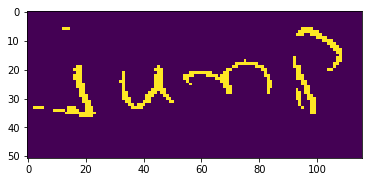

In [8]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
# image_name = "cts.png"
# img_loc = "res/l_"+image_name
img_loc = "test_img/jump.png"
# skel_img = cv2.imread("res/l_"+image_name+".png",0)
img = cv2.imread(img_loc,0)
res , thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

# avg_block = [204, 280, 345, 421, 516, 648, 748, 837]
# avg_block = [204, 280, 421, 516, 648, 748, 837]
# avg_block = [116, 215, 412, 586, 677, 707, 794, 811, 862]



In [9]:
thresh.shape[0]

51

In [115]:
avg_block.insert(0,0)

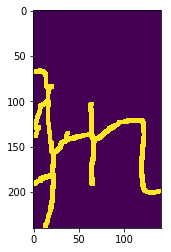

In [106]:
work = thresh[0:240,280:421].copy()
wrk_trans = np.transpose(work)
wrk_trans[0] = [0]*(len(wrk_trans[0]))
wrk_trans[-1] = [0]*(len(wrk_trans[-1]))
work = cv2.dilate(work,None,iterations=2)
plt.imshow(work)

In [10]:
im2,ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
len(ctrs)

8

93 6 16 15


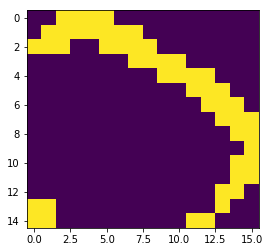

In [18]:
x, y, w, h = cv2.boundingRect(ctrs[6])
roi = thresh[y:y+h, x:x+w]
plt.imshow(roi)
print(x,y,w,h)

[17]


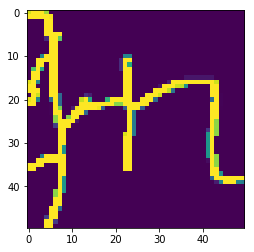

In [110]:
w_img = cv2.resize(roi,(50,50))
vv = []
vv.append(w_img)
plt.imshow(w_img)
V = np.array(vv).reshape(-1,50,50,1)
clss = loaded_model.predict_classes(V)
print(clss)

In [111]:
chr(97+clss[0])

'r'

In [60]:
from tensorflow.keras.models import Model

# model = ...  # include here your original model

layer_name = loaded_model.layers[-2].name
intermediate_layer_model = Model(inputs=loaded_model.input,
                                 outputs=loaded_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(V)

In [61]:
new_out = []
for val in intermediate_output[0]:
    if(val > 0):
        new_out.append(val)
    else:
        new_out.append(0)

In [62]:
div = sorted(new_out)[-1]
new_out = new_out / div
print ([val for val in new_out if val>.60])

[0.8314470802069255, 0.6094737426125785, 0.7577812546466133, 0.6402897489330821, 0.7100572351791068, 0.8866888150609081, 0.8949049372277224, 1.0]


In [52]:
new_out

array([0.67547616, 0.        , 0.        , 0.31952943, 0.        ,
       0.09802509, 0.        , 0.        , 0.09965895, 0.        ,
       0.10481768, 0.09391505, 0.47092954, 0.17681556, 0.        ,
       0.        , 0.43826967, 0.        , 0.59200003, 0.        ,
       1.        , 0.        , 0.29725518, 0.11098466, 0.        ,
       0.        ])

In [86]:
height = thresh.shape[0]

0 116
o


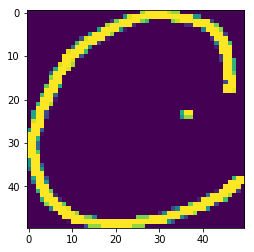

116 215
o


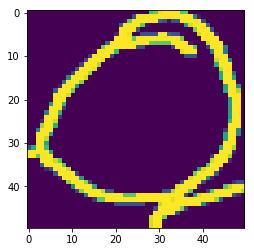

215 412
x


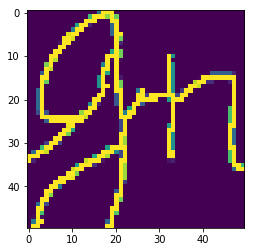

412 586
s


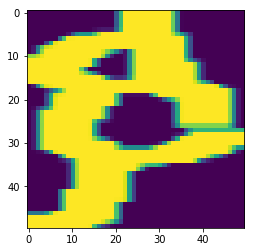

586 677
o


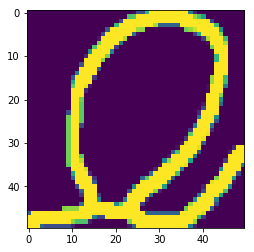

677 707
l


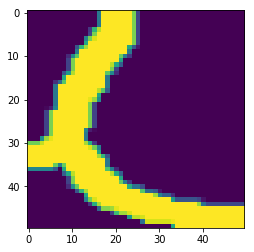

707 794
o


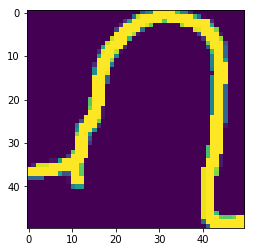

794 811
z


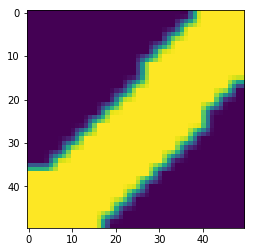

811 862
w


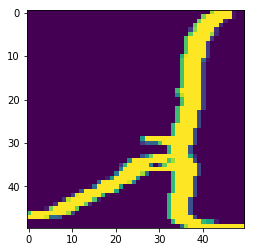

ooxsolozw


In [116]:
res = ""
for val in range(len(avg_block)-1):
    work = thresh[0:height,avg_block[val]:avg_block[val+1]].copy()
    wrk_trans = np.transpose(work)
    wrk_trans[0] = [0]*(len(wrk_trans[0]))
    wrk_trans[-1] = [0]*(len(wrk_trans[-1]))
    work = cv2.dilate(work,None,iterations=2)
    print (avg_block[val],avg_block[val+1])
    # Find Contours 
    im2,ctrs, hier = cv2.findContours(work.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if(len(ctrs) == 1):
        x, y, w, h = cv2.boundingRect(ctrs[0])
    else:
        for item in ctrs:
            if(item.shape[0]>60):
                x, y, w, h = cv2.boundingRect(item)
                break
    # region of interest 
    roi = work[y:y+h, x:x+w]
    w_img = cv2.resize(roi,(50,50))
    vv = []
    vv.append(w_img)
    plt.imshow(w_img)
    V = np.array(vv).reshape(-1,50,50,1)
    clss = loaded_model.predict_classes(V)
    print(chr(97+clss[0]))
    res = res + ( chr(97+clss[0]) )
    plt.show()

print (res)

    
    
    
    

In [21]:
res = ""
for img in ctrs:
    try:
        w_img = cv2.resize(img,(50,50))
        vv = []
        vv.append(w_img)
        plt.imshow(w_img)
        V = np.array(vv).reshape(-1,50,50,1)
        clss = loaded_model.predict_classes(V)
        print(chr(97+clss[0]))
        res = res + ( chr(97+clss[0]) )
        plt.show()
    except Exception as e:
        print (e)
        pass
print (res)

    
    
    
    

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'

OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:3922: error: (-215:Assertion failed) func != 0 in function 'resize'



In [22]:
from imutils.contours import sort_contours

In [23]:
contours, _ = sort_contours(contours, )

NameError: name 'contours' is not defined

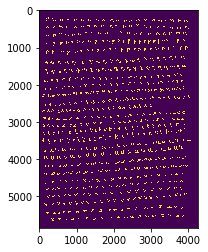

In [40]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
# image_name = "cts.png"
# img_loc = "res/l_"+image_name
img_loc = "test_img/page_4.png"
# skel_img = cv2.imread("res/l_"+image_name+".png",0)
img = cv2.imread(img_loc,0)
res , thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
thresh = cv2.dilate(thresh,None,iterations=1)
plt.imshow(thresh)

# avg_block = [204, 280, 345, 421, 516, 648, 748, 837]
# avg_block = [204, 280, 421, 516, 648, 748, 837]
# avg_block = [116, 215, 412, 586, 677, 707, 794, 811, 862]



In [41]:
im2,ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [50]:
len(ctrs)

777

In [51]:
contours, _ = sort_contours(ctrs, )

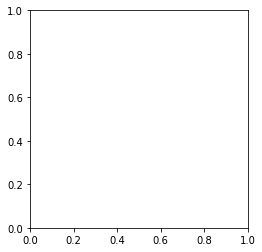

In [49]:
res = ""
for contour in contours:
    try:
#         w_img = cv2.resize(contour,(50,50))
#         vv = []
#         vv.append(w_img)
        plt.imshow(contour)
#         V = np.array(vv).reshape(-1,50,50,1)
#         clss = loaded_model.predict_classes(V)
#         print(chr(97+clss[0]))
#         res = res + ( chr(97+clss[0]) )
        
    except:
        pass
    plt.show()
    break

    